# Unsupervised Learning - Data Clustering
#### Edmar Junyor Bevilaqua

### Gaussian Mixture Models - Demo 3

* GMM as a generative model.
* Synthetic dataset.

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Creating function to test GMM and plot the gaussians

In [3]:
def train_and_plot(data, k=3, covariance_type='full', tol=0.001, 
                   max_iter=100, n_init=1, init_params='kmeans', random_state=133):
    
    # We copy the data and remove the label column
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = GaussianMixture(n_components=k, covariance_type=covariance_type, tol=tol,
                            max_iter=max_iter, n_init=n_init, init_params=init_params, random_state=random_state)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.predict(data_copy)
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    means = model.means_
    means_x = means[:,0]
    means_y = means[:,1]

    _ = plt.scatter(means_x, means_y, color='black', s=100)
    
    w_factor = 0.2 / model.weights_.max()
    
    if covariance_type == 'tied':
        covars = np.repeat(model.covariances_, k, axis=0)
    else:
        covars = model.covariances_
        
    for pos, covar, w in zip(model.means_, covars, model.weights_):
        draw_ellipse(pos, covar, covariance_type, alpha=w * w_factor)
    
    return model

def draw_ellipse(position, covariance, covariance_type, ax=None, **kwargs):
    """
    Draw an ellipse with a given position and covariance
    
    Method adapted from: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    elif covariance_type == 'spherical':
        angle = 0
        width = 2 * np.sqrt(covariance)
        height = width
    else:
        angle = 0
        width, height = 2 * np.sqrt(np.abs(covariance))
    
    # Draw the Ellipse
    ax.axis('equal')
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


### GMM to generate data

In [5]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


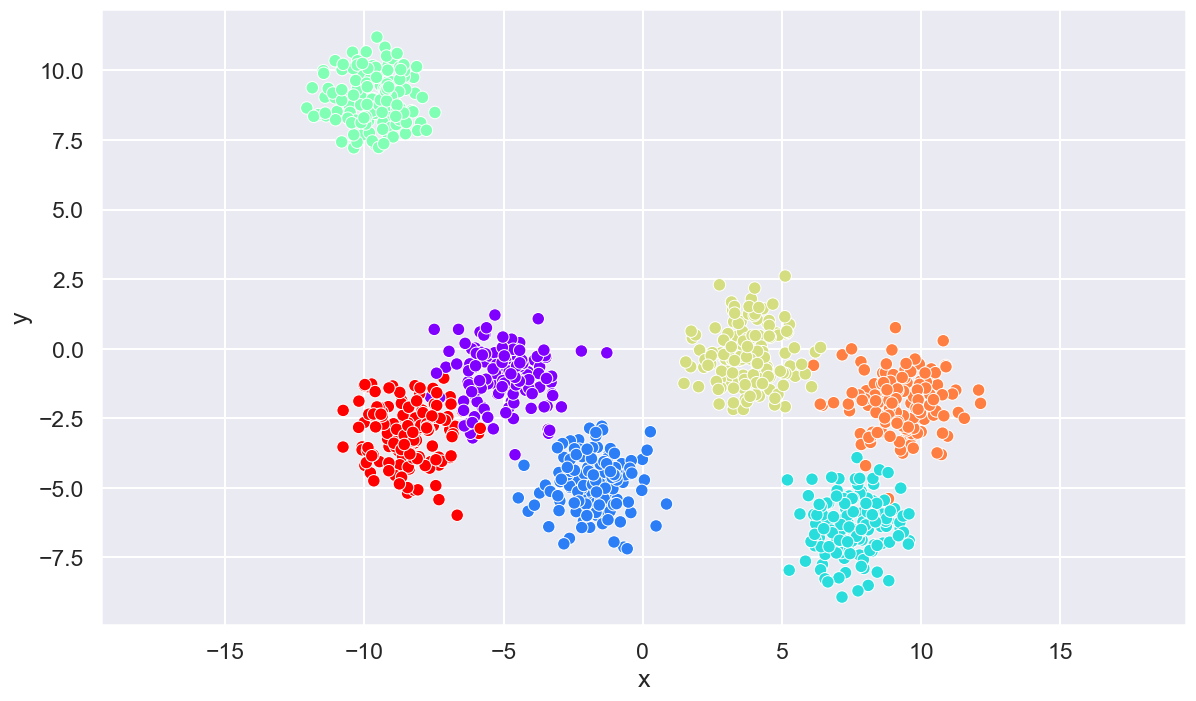

In [6]:
ax = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)
_ = ax.axis('equal')

### Training GMM

C:\Users\edmar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\edmar\AppData\Local\Temp\ipykernel_29436\3871395307.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


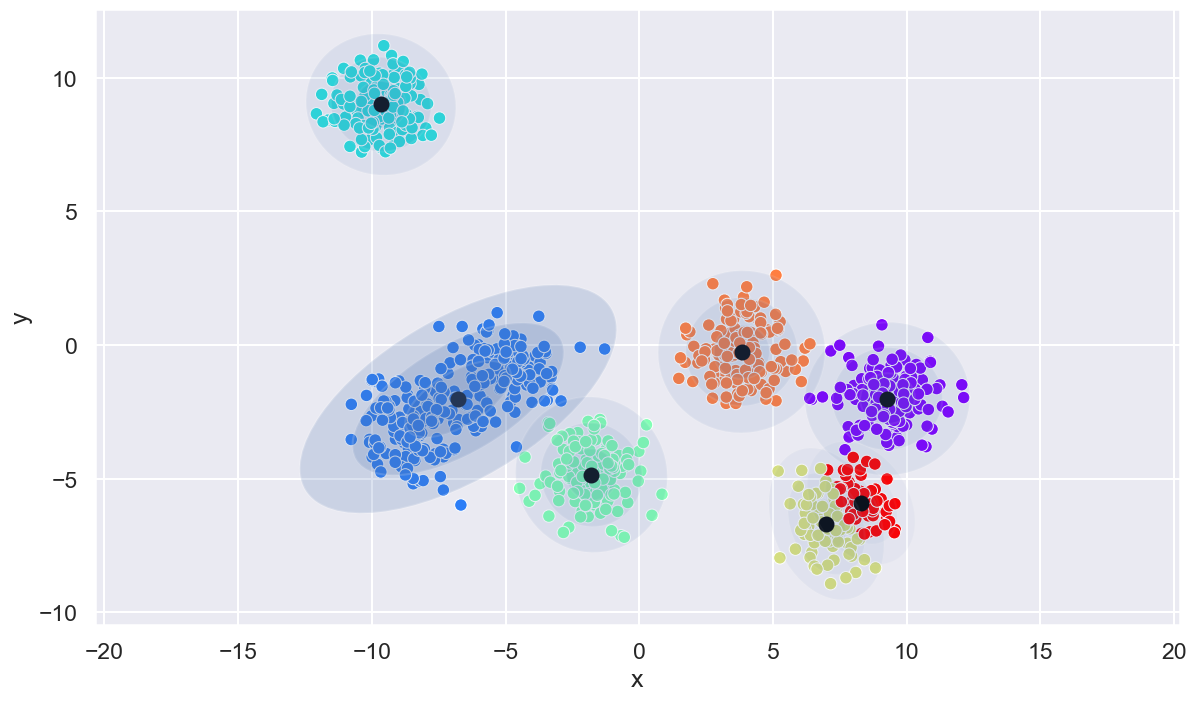

In [7]:
trained_gmm = train_and_plot(df, k=7, random_state=33)

### Generate samples with trained GMM

In [26]:
n_samples = 700
gen_samples = trained_gmm.sample(n_samples)[0]

In [27]:
gen_samples_df = pd.DataFrame(gen_samples, columns=['x', 'y'])
gen_samples_df.head()

,x,y
0,9.208776,-1.016186
1,10.582187,-3.996743
2,10.182154,-1.129025
3,10.274642,-1.588396
4,7.643529,-1.497833


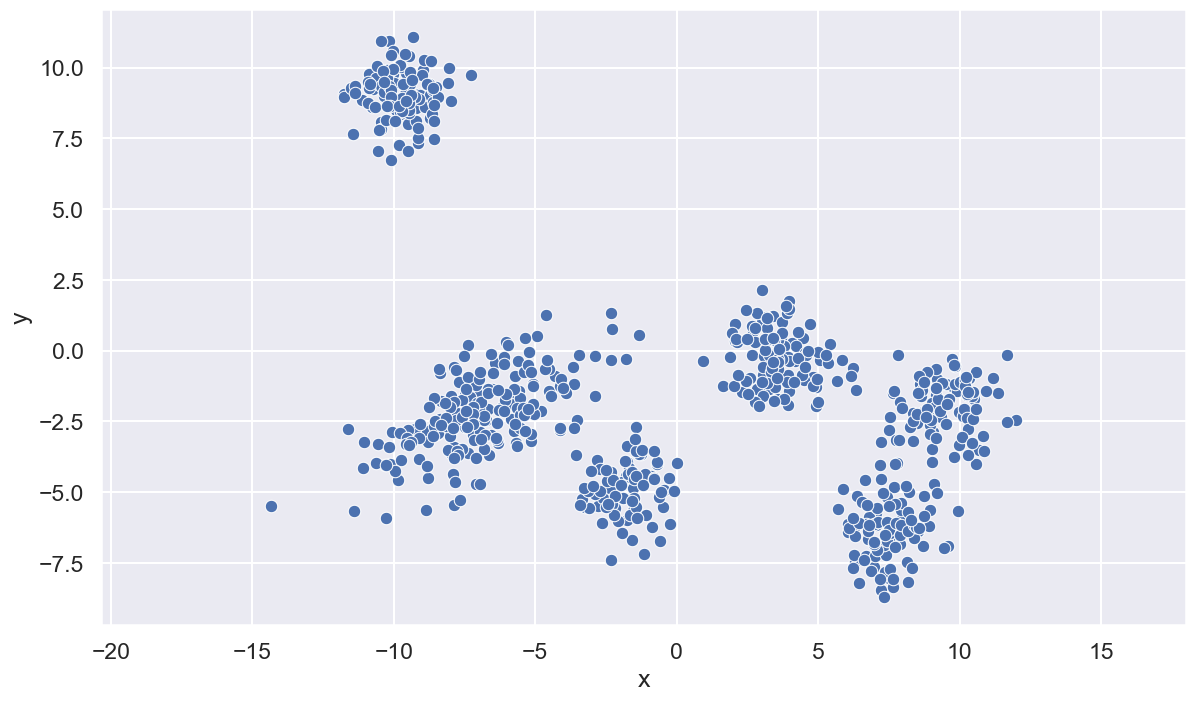

In [28]:
ax = sns.scatterplot(x='x', y='y', data=gen_samples_df, legend=False)
_ = ax.axis('equal')